In [34]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
dog_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\cane")

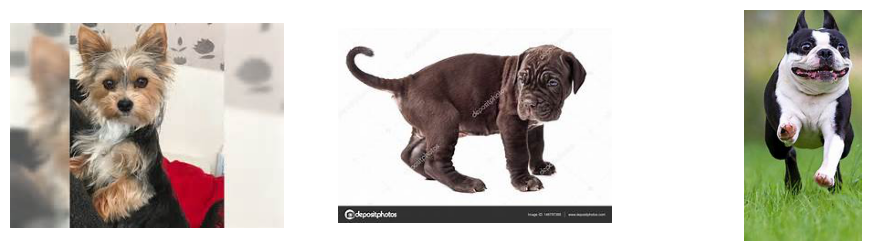

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
normal_img = [os.path.join(dog_training_set, file)
              for file in os.listdir(dog_training_set)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(normal_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

In [2]:
horse_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\cavallo")

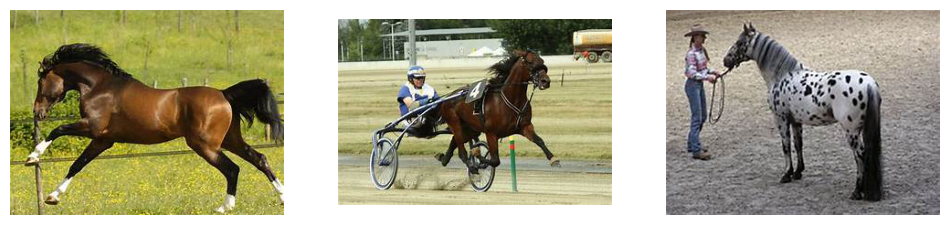

In [15]:
normal_img = [os.path.join(horse_training_set, file)
              for file in os.listdir(horse_training_set)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(normal_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

In [3]:
Elephants_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\elefante")

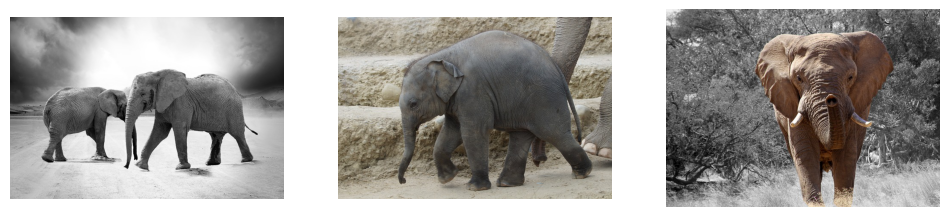

In [17]:
normal_img = [os.path.join(Elephants_training_set, file)
              for file in os.listdir(Elephants_training_set)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(normal_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

In [36]:
butterfly_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\farfalla")
chicken_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\gallina")
cat_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\gatto")
cow_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\mucca")
lamb_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\pecora")
spider_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\ragno")
squirrel_training_set = os.path.join(r"C:\Users\wange\Downloads\Image Recognition\Data Set\train\scoiattolo")

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\wange\Downloads\Image Recognition\Data Set\train',
    target_size=(500, 500),
    batch_size=128,
    class_mode='binary'
)
test_generator = train_datagen.flow_from_directory(
    r'C:\Users\wange\Downloads\Image Recognition\Data Set\test',
    target_size=(500, 500),
    batch_size=128,
    class_mode='binary'
)

Found 26179 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [42]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(500, 500, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
       
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 498, 498, 16)      448       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 249, 249, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 247, 247, 32)      4640      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 123, 123, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 60, 60, 64)     

In [44]:
#compiling CNN 
from tensorflow.keras.optimizers import RMSprop
cnn.compile(loss="binary_crossentropy",
             optimizer=RMSprop(learning_rate=0.0001),
             metrics=['accuracy'])

In [49]:
#test CNN
history = cnn.fit(
    train_generator,
    validation_data = test_generator,
    epochs=15,
    verbose=1,
)

Epoch 1/15
  2/205 [..............................] - ETA: 36:33 - loss: -67965.7188 - accuracy: 0.1172  

KeyboardInterrupt: 